Predict if a tweet refers to a disaster with NLP
-----------------------------

![disaster](https://www.nfcc.org/wp-content/uploads/2021/10/natural-disasters.jpg)

If a disaster happen on the world (somewhere), people begin to send messages on twitter or on other social medias. Those messages are collected plus others that don't talk about disaster. Then with the new natural language processing (nlp) methods we can make complex computations to differentiate each tweet and classify it easily with a created model (neural network, decision tree, regression model, ...). We will use in our task a neural network model and some deep nlp preprocessing. Let's identify, first, what will be the different parts of our notebook:

- Exploratory Data Analysis 
1. What is the shape of the Data frame ?
2. What is the type of each variable and can you make a brief description of each of them ? 
3. Does it contains null data or duplicated data ?
4. What columns will interest us ? For that we must describe different columns and make some interesting graphics to visualize correlations between different columns.
5. Does the data contains outliers or incoherences ?
6. Does the data contains to short or to long tweets and are they outliers ?
7. Can we say that the classes are unbanlanced ?
8. Can we guess easily the class of some tweets ?
9. Can we detect some patterns or key words in the tweets ?
10. What will the accuracy score that a human would know if they manually predict the data ? 
- Text Processing
1. Write a function which will help use tokenizing the tweets, deleting stop words, removing tokens with more than 3 letters,
2. How will we create the corpus (i.e a text containing all the documents)
3. If we obtain the corpus, how many unique tokens will we have? That number of tokens do it seems too small or to large to you?
4. How to reduce that number of unique tokens, or in other words "How to reduce the size of the vocabulary" in that corpus?
5. How many tokens are seen one time in the corpus? Those tokens do they interest us?
6. Do a stemming method will help us to reduce the dimensionality of the corpus?
7. How to graphically visualize, with the help of a WordCloud, for example, the most present tokens in the corpora ?
8. How we can apply every previous processes to create a new must pertinent column "text"?   

In [2]:
# import the necessary
from nlp_project import *

# let's modify the pandas options to display more observations 
pd.options.display.max_rows = 100

### EDA (Exploratory Data Analysis)

#### Identify the shape of the data

Let's import the dataset. We will focus only on the training set for the moment.

In [3]:
# before taking the data we can print the different elements in the directory represent as a tree
!tree

Structure du dossier
Le num�ro de s�rie du volume est C29F-F48A
C:.
+---.vscode
+---nlp_project
    +---data
    �   +---data_+
    �   +---kaggle_tweet_competition
    +---__pycache__


We placed the csv file in the sub directory kaggle_tweet_competition

In [4]:
# recuperate the train set
train_set = pd.read_csv('nlp_project/data/kaggle_tweet_competition/train.csv')

We will use a copy of the original data frame to avoid missing some interesting data during many transformations that will be made.

In [5]:
train_set_ = train_set.copy()

Let's print the shape.

In [6]:
train_set_.shape

(7613, 5)

It contains 7613 observations and 5 variables.

#### Identify the data types and make a description of each column

Let's verify the data type of each column.

In [7]:
train_set_.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Let's show some observations to make a brief description of the data frame if possible.

In [8]:
# Show the first lines
train_set_.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
# Show the last lines
train_set_.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [10]:
# Show a sample
train_set_.sample(10)

,id,keyword,location,text,target
5256,7517,oil%20spill,NYC :) Ex- #Islamophobe,National Briefing | West: California: Spring O...,1
1876,2695,crush,w. Nykae,More than a crush ???????????? WCE @nykaeD_ ??...,0
1081,1561,bomb,"Edmonton, Alberta",I came up with an idea of a fragrance concept ...,1
4902,6978,massacre,Stay Tuned ;),@freddiedeboer @Thucydiplease then you have ri...,1
760,1099,blew%20up,"Iowa, USA",@CodyThompson25 ty just blew up the motor went...,0
899,1301,bloody,"Level 3 Garrison, Sector G",Bloody hell what a day. I haven't even really ...,0
4252,6041,heat%20wave,NaN,Apocalpytic Iran Heat Wave Nearly Breaks World...,1
4961,7071,meltdown,"Colorado, USA",@nprfreshair I really can't believe he is skip...,0
6500,9293,survive,"Semarang, Indonesia",Parental experience may help coral offspring s...,0
476,686,attack,#UNITE THE BLUE,@blazerfan not everyone can see ignoranceshe i...,0


- id

It seems that the id column contains integers and it contains certainly a large range of numbers. We must print the number of non unique values to make a better understanding of that variable.

In [11]:
train_set_['id'].nunique()

7613

If we compare the number of lines in the data frame (shape 0) and the number of non unique values we see clearly they are the sames. So the id identifies each line. The id don't add any more information about the target since it identify each line and not each target (not correlated with the target). Remove the id column will not negatively influence the performance of the model.

- keyword

It seems that the keyword contains strings and some missing values. The non missing values seems to be only some words and not a large document if we consider each different observation. We can count the occurrence of each unique value in the keyword column.

In [12]:
train_set_['keyword'].value_counts(normalize=True)*100 # normalize to get percentages

fatalities               0.595869
deluge                   0.556144
armageddon               0.556144
sinking                  0.542903
damage                   0.542903
                           ...   
forest%20fire            0.251589
epicentre                0.158898
threat                   0.145657
inundation               0.132415
radiation%20emergency    0.119174
Name: keyword, Length: 221, dtype: float64

So we have 221 unique values in the keyword which is a important number. If we delete the missing values it will rest 220 unique values. The keyword seems to categorize the text but we don't need that type of categorization since they can be incoherent with the target. The keyword is the word identifying the text and may add a bias in the model since it can make wrong classifications of the texts. We will make a better investigation later with some graphics.

- location

The location identify the city that the text or the tweet refers to. It will certainly contains missing values because some tweet (not disaster) don't talk about events happening in a specific city. The location can be interesting if the missing values refer, in the most of the cases, to not disaster events. We will verify those hypotheses in the next steps.  

- text

The text is the posted tweet. It is the most important column because it contains the most important part of the information. Each line is a different document that may contains different words of interest. That words indicates if a tweet talk about a disaster or not. 

Let's see how many unique values are in the text column.

In [13]:
train_set_['text'].nunique()

7503

It contains 7503 unique values. It seems that some documents are duplicated because each document must be unique. Maybe a tweet was shared many times or some people have wrote same tweets for different contexts. We didn't see any missing value in the text sample that we showed previously. But we must verify those things in the next steps.

- target

The target is the purpose of the tweet. It seems that it can contains only two values 1 and 0. Since some tweets talk about disasters and have a target value of 1, it seems that the 1 refers to an disaster event and the 0 to a non disaster event.

Let's print the occurrence of each unique value in the target.

In [14]:
train_set_['target'].value_counts(normalize=True) * 100 # normalize the values to get the percentages

0    57.034021
1    42.965979
Name: target, dtype: float64

The target column don't contains any missing value and it seems that the classes are not too umbanlanced.

Let's make a graphic for a better view of the classes' occurrences.

In [15]:
class_occurrence = train_set_['target'].value_counts(normalize=True) * 100
px.pie(data_frame=train_set_, names='target')

In the model we will specify the weights of the target classes to balance them during the training.

### Missing data and duplications

Let's identify the missing data with graphic.

In [16]:
# Recuperate the missing data (true if missing data, false if not)
null_data = train_set_.isnull()

Let's make a heat map to visualize the proportions

<AxesSubplot: >

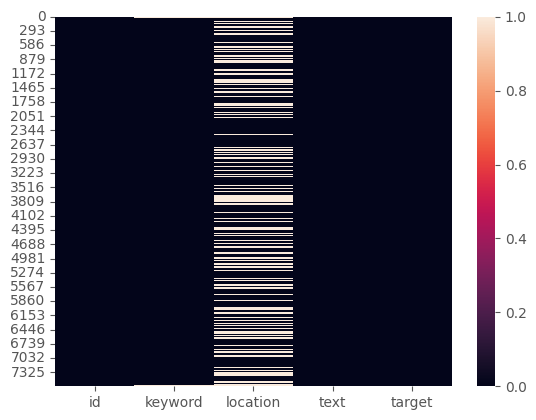

In [17]:
sns.heatmap(null_data)

We can see clearly that the most of the missing data are contained by the location column. But to make a more clear observation we must calculate the percentage of missing data for each column.

In [18]:
null_percentages = null_data.mean(axis = 0) * 100 # transform to percentage

In [76]:
print(f"{4:->4}")

---4


In [19]:
null_percentages

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

The location column contains 33% of missing data and the keyword column contains only 0.8% of missing data.

<AxesSubplot: title={'center': 'Percentages of missing data for each column'}, xlabel='columns', ylabel='Percentages'>

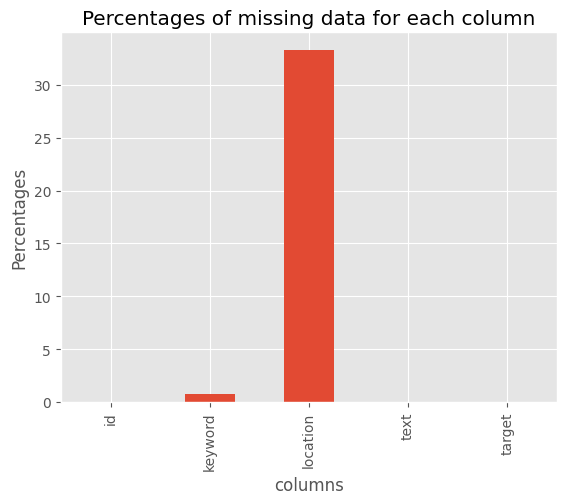

In [20]:
# Make a barplot of the missing data percentages
null_percentages.plot(kind="bar",
                      title="Percentages of missing data for each column",
                      xlabel="columns",
                      ylabel="Percentages")

**final conclusion:** The location column contains 33% (the most important percentage) of missing data and the keyword column contains 0.8% of missing data.

The location column is not a very interesting column since it contains a high number of missing data and we don't want to remove all 33% of observations neither change fill missing data because we don't know the true locations. But we have to do the later because, like we specified earlier, we can create a new column to investigate the correlation between the missing data and the target column.

In [21]:
# we must fill the missing data by commas. Only column of type string contains missing data so we will fill them with commas
train_set_.fillna('', inplace = True)

In [22]:
# let's create a new column which identify if a location is provided or not
train_set_['null_location'] = train_set_['location'].map(lambda loc: 1 if loc == '' else 0)

We will use graphics to make sure that the null location is correlated with the target.

In [23]:
# Let's save the current version of the data frame
train_set_.to_csv('nlp_project/data/data_+/null_loc.csv', index=False)

-------------------------------------------

Let's identify the duplicated lines.

In [24]:
train_set_.duplicated().sum()

0

The sum of duplicated observations is equal to 0 if we consider all the subsets.

Let's do the same thing but with each column as a subset. 

In [25]:
def get_duplicated(data_frame: pd.DataFrame):
    duplic_dict = {}
    for column in data_frame.columns:
        duplic_dict[column] = data_frame.duplicated(subset=column).sum()
    return pd.DataFrame.from_dict(duplic_dict, 'index')
    

In [26]:
duplications = get_duplicated(train_set_)

In [27]:
duplications

,0
id,0
keyword,7391
location,4271
text,110
target,7611
null_location,7611


We can notice two important things here:
- Text column contains 110 duplicated documents. But we must verify if those duplications have the same contexts (target class).
- Target and null location columns have the same number of duplications. It indicates that they may be very correlated.  

Let's get the number of duplications for the subset ['target', 'text']

In [28]:
train_set_.duplicated(subset=['target', 'text']).sum()

92

So obtain 92 duplicate observations having the same contexts. Let's delete directly those duplicated columns.

In [29]:
train_set_.drop_duplicates(subset=['target', 'text'], inplace=True)

After that we can count the duplicated observations for the subset ['target', 'null_location']

In [30]:
train_set_.duplicated(subset=['target', 'null_location']).sum()

7517

We obtain a hugh number of duplications. So the two columns can be very correlated.

We have to make more robust investigations before concluding.

In [31]:
# save the duplications data frame
duplications.rename({0: 'duplications'}, axis=1).to_csv('nlp_project/data/data_+/duplications.csv')

In [32]:
# save the data frame with we no duplicated documents
train_set_.to_csv('nlp_project/data/data_+/no_duplications.csv', index=False) 

#### Columns of interest

We can delete the id column (it make not interest) and analyze the keyword column.

In [33]:
train_set_.drop(columns=['id'], inplace=True)

In [34]:
# save the data frame with no id column
train_set_.to_csv('nlp_project/data/data_+/no_id.csv', index=False)

Let's look at some unique values of the keyword column.

In [35]:
train_set_['keyword'].sample(30).unique()

array(['airplane%20accident', 'sandstorm', 'loud%20bang', 'smoke',
       'fire%20truck', 'hostage', 'sinkhole', 'ablaze', 'quarantine',
       'screaming', 'suicide%20bomber', 'flooding', 'tornado', 'bleeding',
       'accident', 'engulfed', 'wounded', 'exploded', 'blizzard',
       'apocalypse', 'evacuated', 'fatal', 'aftershock', 'war%20zone',
       'obliteration', 'police', 'destroyed'], dtype=object)

Apparently the keyword column contains interesting words that can identify the type of the tweets. But like we noticed earlier some of them can be 
fakes' since a same keyword can identify both of the 'disaster' and the 'not disaster' events.

The most important columns are certainly `text` (we are working on the texts of the tweets) and `target` that we want to predict.

#### Outliers and incoherences

Let's verify if some of the keywords correspond to their texts.

- For example with the keyword 'accident'

In [36]:
accidents = train_set_[train_set_['keyword'] == 'accident']

In [37]:
accidents

,keyword,location,text,target,null_location
67,accident,CLVLND,'I can't have kids cuz I got in a bicycle acci...,0,0
68,accident,"Nashville, TN",Accident on I-24 W #NashvilleTraffic. Traffic ...,1,0
69,accident,"Santa Clara, CA",Accident center lane blocked in #SantaClara on...,1,0
70,accident,UK,http://t.co/GKYe6gjTk5 Had a #personalinjury a...,0,0
71,accident,"St. Louis, MO",#stlouis #caraccidentlawyer Speeding Among Top...,0,0
72,accident,"Walker County, Alabama",Reported motor vehicle accident in Curry on He...,1,0
73,accident,Australia,BigRigRadio Live Accident Awareness,1,0
74,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1,0
75,accident,,RT @SleepJunkies: Sleeping pills double your r...,0,1
76,accident,Norf Carolina,'By accident' they knew what was gon happen ht...,0,0


In [38]:
accidents['target'].value_counts()

1    24
0    11
Name: target, dtype: int64

We see that the most of the tweets actually talk about disaster events. Let's look for the 'apocalypse' word.

In [39]:
apocalypse = train_set_[train_set_['keyword'] == 'apocalypse']

In [40]:
apocalypse

,keyword,location,text,target,null_location
272,apocalypse,ColoRADo,I'm gonna fight Taylor as soon as I get there.,0,0
273,apocalypse,sindria,ohH NO FUKURODANI DIDN'T SURVIVE THE APOCALYPS...,1,0
274,apocalypse,,will there be another jocelyn birthday apocalypse,0,1
275,apocalypse,,RT: janenelson097: RT StephenSCIFI: Adaptation...,0,1
276,apocalypse,Texas,Apocalypse please,0,0
277,apocalypse,"Elk Grove, CA, USA",Another hour! It's August 05 2015 at 08:02PM H...,1,0
278,apocalypse,Texas,@HoneyBunzGem @primalkitchen I feel like me do...,0,0
279,apocalypse,,She's kinda hot played on the radio today. Wha...,0,1
280,apocalypse,The Shire,But if it's the apocalypse lol gf m8,0,0
281,apocalypse,"Austin, TX",I know it's a question of interpretation but t...,1,0


In [41]:
apocalypse['target'].value_counts()

0    23
1     9
Name: target, dtype: int64

Here we see that most of the tweets contains 'jokes' (are not serious) and don't talk about apocalypse. So that keyword doesn't represent the truth about the tweets. Let's look at another keyword like 'annihilated'. 

In [42]:
annihilated = train_set_[train_set_['keyword'] == 'annihilated']


In [43]:
annihilated

,keyword,location,text,target,null_location
209,annihilated,Higher Places,The episode where Trunks annihilated Freiza is...,0,0
210,annihilated,"Horsemind, MI",THEY SHALL BE ANNIHILATED AND ALL OF THEIR PET...,0,0
211,annihilated,"New York, NY",Uribe just annihilated that baseball. #Mets,0,0
212,annihilated,Boksburg,@marksmaponyane Hey!Sundowns were annihilated ...,0,0
213,annihilated,,@Volfan326 @TNeazzy Mizzou has annihilated flo...,0,1
214,annihilated,,Annihilated Abs . ?? http://t.co/1xPw292tJe,1,1
215,annihilated,,Be annihilated for status education mba on beh...,0,1
216,annihilated,"V-RP @OZRP_ ?MV, AU, R18+?",*to Luka* They should all die! All of them! Ev...,0,0
217,annihilated,"Greater Manchester, UK",@ACarewornHeart Have a good un fella sorry I w...,0,0
218,annihilated,Boston,Cop pulls drunk driver to safety SECONDS befor...,1,0


In [44]:
annihilated['target'].value_counts()

0    23
1    11
Name: target, dtype: int64

Like the last one, most of the tweets don't talk about annihilation so the keyword annihilation can be interpreted like a falsy index of a non disaster. It may be dangerous since we can't differentiate a disaster tweet from a non disaster tweet based only on the keyword.

Some keywords can be useful because they represent the target. But it is important to make more investigations.

We can trace the count plot of each keyword by target class. 

Text(0.5, 1.0, 'Number of keywords by target value')

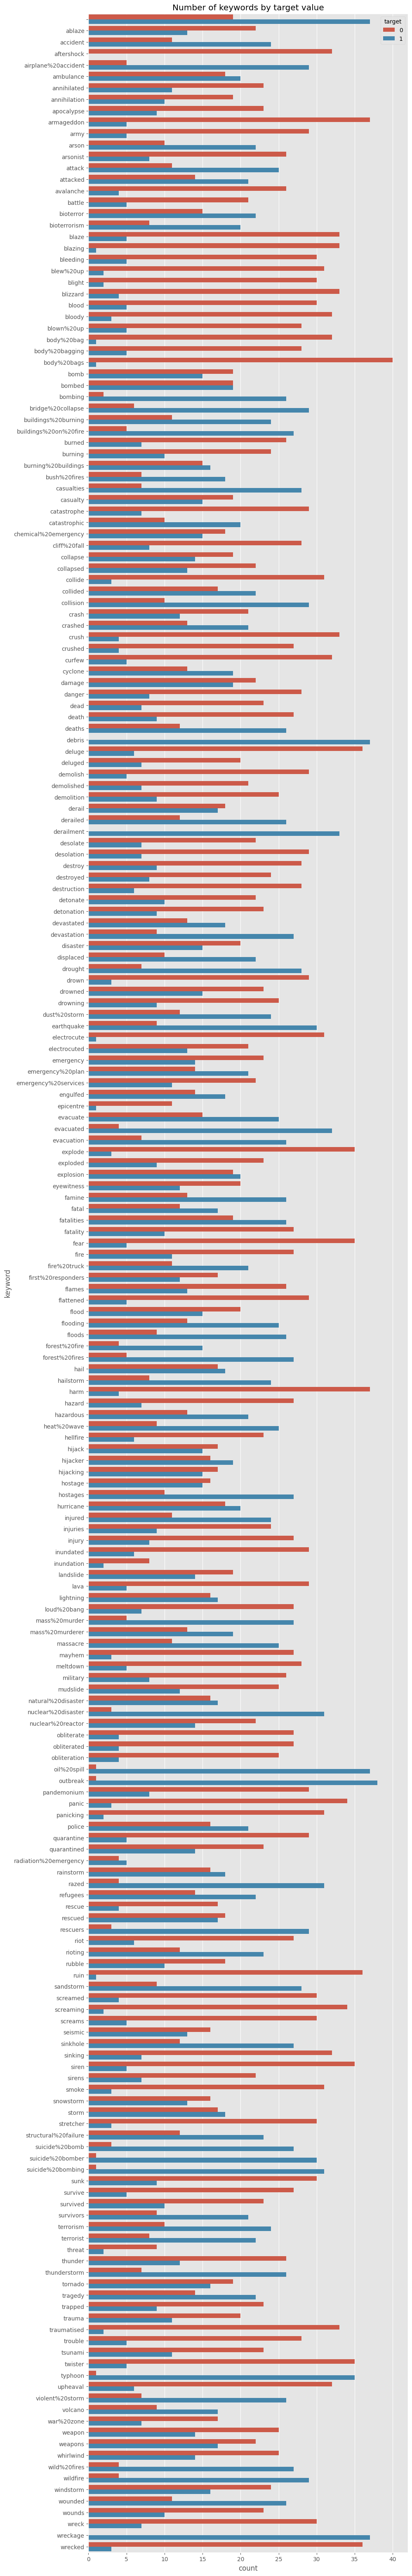

In [45]:
plt.figure(figsize=(10, 80))
sns.countplot(data=train_set_, y = 'keyword', hue='target')
plt.title("Number of keywords by target value")

With the previous graphic we can see clearly that the most of the keywords are incoherent with the target. But it seems that special keywords, inversely, represents the disaster target. 

In example: the keyword 'bush fires' cannot be used now because Bush is not actually the president of the USA. 

So the keyword column is not a very useful variable because her distribution can change over the periods. It is highly correlated with the time steps. So we must remove it from the data frame.

It can be useful only for identifying the exaggeration made by the tweeters. The keyword 'apocalypse' doesn't represent the target because it is a unusual case.

In [46]:
# drop the keyword column
train_set_.drop(columns=['keyword'], axis=1, inplace=True)

In [47]:
train_set_.head()

,location,text,target,null_location
0,,Our Deeds are the Reason of this #earthquake M...,1,1
1,,Forest fire near La Ronge Sask. Canada,1,1
2,,All residents asked to 'shelter in place' are ...,1,1
3,,"13,000 people receive #wildfires evacuation or...",1,1
4,,Just got sent this photo from Ruby #Alaska as ...,1,1


In [48]:
# save the current version of the data frame
train_set_.to_csv('nlp_project/data/data_+/no_id_keyword.csv', index=False)

In [49]:
# save create data frame
apocalypse.to_csv('nlp_project/data/data_+/apocalypse.csv', index=False)
accidents.to_csv('nlp_project/data/data_+/accidents.csv', index=False)
annihilated.to_csv('nlp_project/data/data_+/annihilated.csv', index=False)

#### Shortest and longest tweets

Let's look at the length of the shortest tweet and the length of the longest tweet by creating a new column named as `tweet len`.

In [50]:
# create a new column containing the length of the tweets
train_set_['tweet_len'] = train_set_['text'].map(lambda x: len(x))

Let's show the 20 min length and 20 max length by sorting the observations by the tweet lengths.

In [51]:
train_set_.sort_values('tweet_len', axis=0, inplace=True)
train_set_.head(20)

,location,text,target,null_location,tweet_len
1882,,Crushed,0,1,7
4890,,Bad day,0,1,7
5115,,Err:509,0,1,7
3670,Rafael castillo,fatality,0,0,8
30,,The end!,0,1,8
4971,,Meltdown,0,1,8
24,,LOOOOOOL,0,1,8
3667,Nairobi,Fatality!,0,0,9
28,,Cooool :),0,1,9
6705,,Thunder???,0,1,10


We see that the shortest tweets have as target value 0 (no disaster events). They don't talk about disaster events.

In [52]:
train_set_.tail(20)

,location,text,target,null_location,tweet_len
6701,Baydestrian,suddenly it's off &amp; on gloomy &amp; thunde...,1,0,146
7460,?Gangsta OC / MV RP; 18+.?,@IcyMagistrate ÛÓher upper armÛÒ those /frig...,1,0,146
6056,ill yorker,ÛÏ@FDNY: This morning #FDNY responded to a si...,1,0,147
6555,Glasgow,Today your life could change forever - #Chroni...,0,0,147
5379,518 åá NY,Savs contact fell out but she was convinced it...,0,0,147
7276,Richardson TX,???? throwback Thurs ?? ???? Will You Still L...,0,0,147
6474,"West Coast, USA",@CodeMeW Were you opening regular or master pa...,0,0,147
4402,,Û÷Good SamaritansÛª shot in horror hijacking...,1,1,147
6926,Displaced Son of TEXAS!,ÛÏ@YMcglaun: @JulieKragt @WildWestSixGun You'...,0,0,147
257,,@willienelson We need help! Horses will die!Pl...,1,1,148


But for the longest tweets we see that the target variate over 1 and 0.

In [53]:
# let's identify the longest and the shortest texts
train_set_[(train_set_['tweet_len'] == 157) | (train_set_['tweet_len'] == 7)]['text'].values

array(['Crushed', 'Bad day', 'Err:509',
       "when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"],
      dtype=object)

The longest tweet contains at her end only symbols that we can delete by making some transformations on the documents.

It seems that those tweets may be outliers let's take the tweets that are in the interval that we can identify by looking at the box plot of the tweet length.

<AxesSubplot: >

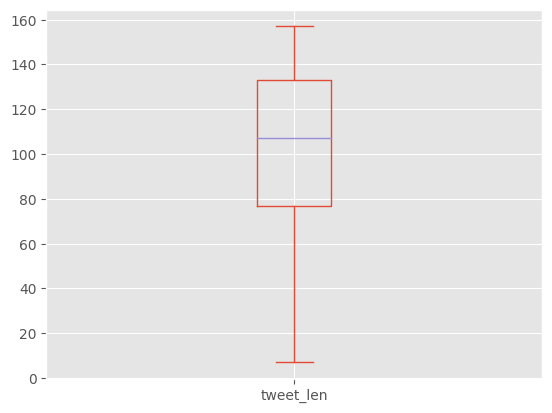

In [54]:
train_set_['tweet_len'].plot(kind="box")

In [55]:
# let's calculate the limitations 
l_high = train_set_['tweet_len'].quantile(0.75) + 1.5 * (train_set_['tweet_len'].quantile(0.75) - train_set_['tweet_len'].quantile(0.25))
l_low = train_set_['tweet_len'].quantile(0.25) - 1.5 * (train_set_['tweet_len'].quantile(0.75) - train_set_['tweet_len'].quantile(0.25))

In [56]:
l_high, l_low

(217.0, -7.0)

The limitations are higher and lower that the max length and the min length so those tweets doesn't represent outliers.

Let's add an interesting sub-part which will make us know much about the correlation between the null column variable and the target and between tweet len column and the target.

Let's separate the quantitative columns with categorical or object columns. 

- The quantitative column is only tweet len 

In [57]:
quantitative = 'tweet_len'

- All other variables are not quantitative columns. However we must separate the object columns from the categorical columns

In [58]:
texts = ['text', 'location']
categorical = ['null_location', 'target']

Let's plot the distribution of the quantitative column for each target value.

<AxesSubplot: xlabel='tweet_len', ylabel='Count'>

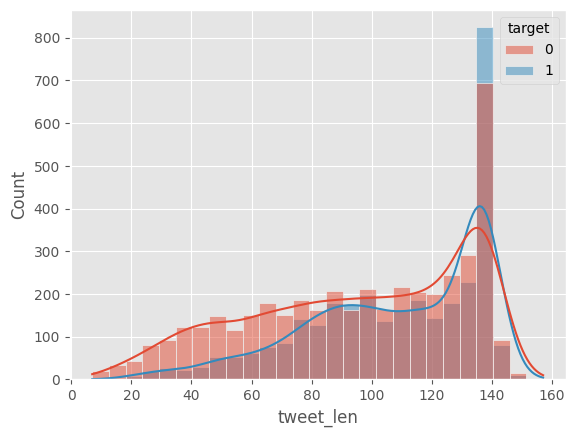

In [59]:
sns.histplot(data=train_set_, x = "tweet_len", hue='target', kde=True)

We obtain almost the same distributions. So the length of a tweet is independent from the target of the tweet.

Let's see if the null_location variable is correlated with the target column.

<AxesSubplot: xlabel='null_location', ylabel='target'>

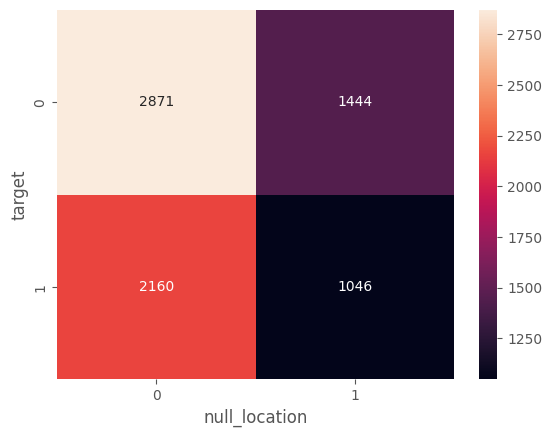

In [60]:
sns.heatmap(pd.crosstab(train_set_['target'], train_set_['null_location']), annot = True, fmt = "d")

It seems that the null location variable and the target variable are not very correlated since we don't see any pattern on the heatmap (example: we don't see things like 'when the target is 1 the null_location is also 1 or also equal to 0' because when the target is 1 we observe the null location can take 0 or 1).

We can trace corr plot to get a more clear representation.

In [61]:
px.imshow(train_set_[categorical].corr())

The null location and the target are not correlated.

So we can drop the null location and tweet len variables because they don't add any interesting information. We can do the same for the location variable because it contains too many null values.

In [62]:
train_set_.drop(columns=['null_location', 'tweet_len', 'location'], inplace=True)

Let's save the first cleaned version of the data frame.

In [63]:
train_set_.to_csv('nlp_project/data/data_+/cleaned_data1.csv', index=False)

#### Identify targets with only text

Let's take randomly some tweets and verify if they represent their targets.

In [84]:
samples = train_set_[['text', 'target']].sample(50)

for index, item in samples.iterrows():
    text = item.text
    target = item.target
    print(f"Text: {text}")
    print(f"Target: {target}")
    print("----------------")

Text: @WonderousAllure crosses her arms to cover her hands from doing anymore damage. 'H-Hello..'
Target: 0
----------------
Text: #Vancouver to host 100s of electronic art events including @MUTEK_Montreal. http://t.co/vjBhxN9x1O #ISEA2015
Target: 0
----------------
Text: @SirTitan45  Mega mood swing on a 24 hr schedule. Isn't that how structural failure occurs?
Target: 0
----------------
Text: #Floored4 #Flattened 

Early birds does get de cups .... so lag bout pun de dock and watch ppl drinkÛ_ https://t.co/r5StV25ZhQ
Target: 0
----------------
Text: We found a sunflower explosion on our walk. http://t.co/vLNmkLWWby http://t.co/P769eo49Fj
Target: 1
----------------
Text: @TomcatArts 'who then were annihilated by the legion itself. The survivors of the imperfect hybrid project quickly formed a new secret cell
Target: 0
----------------
Text: Dragon Ball Z: Battle Of Gods (2014) - Rotten Tomatoes http://t.co/jDDNhmrmMJ via @RottenTomatoes
Target: 0
----------------
Text: . @VELDFest an

We can identify easily, as human we are, the target of a tweet.

#### Identification of the patterns

Some words are commonly used in tweets that do not represent disaster events like, 'hilarious', 'drink', 'happy', '????' (symbols), text containing more special symbols, or just words identifying happiness where other texts can be very useful to identify a disaster event. They may be the more saddest or shortest tweets: They contains some words like 'evacuation', 'falls' or more professional words used only by the people working on disaster events like practical nurse or government agents.

#### Human prediction

A human would certainly predicts the target of a tweet very easily. The accuracy of a human prediction would be  than around 80%: -20% because some tweets can just contains complex jokes that cannot be interpret as they are (not a disaster event) or can be contains bad writings even if they are serious. But if we consider that a human, who have not yet learnt any tweet before, it can be difficult for that person to identify the patterns since he has to learn about how the people like to write a tweet nowadays. 

### Text Processing

### Preprocessing

Before going through the processing we must make some preprocessing on the data frame.

The first thing to do is to replace missing values by commas since the columns containing missing values are of type object.

In [ ]:
train_set_.dtypes

id            int64
keyword      object
location     object
text         object
target        int64
tweet_len     int64
dtype: object

: 

They are, in particular, keyword and location.

In [ ]:
train_set_.fillna('', inplace = True)

: 

We can also only remove the observations for which we find missing values but they may contain some important information about the targets.

Let's remove the location and id columns which do not make any interest to the purpose. 

In [ ]:
train_set_.drop(columns=['id', 'location'], axis=1, inplace=True)

: 

The keyword column may be deleted due to the incoherence between some values and the target. But we will keep it until exploring more deeply the data.

#### Tokenization and text cleaning

Let's create a function that we will apply on the text column. We will work only on that column. Let's recuperate it as a list.

In [ ]:
texts = train_set_['text']

: 

In [ ]:
texts

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

: 

In [ ]:
# transform to list
texts = texts.tolist()

: 

We have to recuperate english stop words before doing the main staff.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

: 

In [ ]:
en_stopwords = set(stopwords.words('english'))

: 

Let's create the function.

In [ ]:
# We transform each document to tokens and remove stopwords and 
# words with length less than 3 in one single line
text_transformation = lambda text, tokenizer, stop_words: [text_ for\
    text_ in tokenizer.tokenize(text.lower())\
        if text_ not in stop_words and len(text_) > 3]

def pre_transformation(texts, stop_words: list, regexp:str = r"\w+"):
    tokenizer = RegexpTokenizer(regexp)
    
    tokens = []
    for text in tqdm(texts):
        tokens.append(text_transformation(text, tokenizer, stop_words))
    
    return tokens

: 

Let's apply the transformation on the texts.

In [ ]:
new_texts = pre_transformation(texts, en_stopwords)

100%|██████████| 7613/7613 [00:00<00:00, 43704.96it/s]


: 

#### Create a corpus containing all the texts

To create a corpus of all the texts we just need to add the documents (or tokens) in one single list of tokens.

In [ ]:
corpus = []
for document in tqdm(new_texts):
    
    corpus.extend(document)

100%|██████████| 7613/7613 [00:00<00:00, 411156.50it/s]


: 

It's possible to use the nltk Text class to make interesting search and analyzes. 

In [ ]:
corpus_text = nltk.text.Text(corpus)

: 

In [ ]:
# print the length of the corpus
len(corpus)

69943

: 

It contains 69943 words. We can make the corpus to be a one single text by using the usefully `join` function.

In [ ]:
text_corpora = " ".join(corpus)

: 

#### How many unique tokens 

Let's count the number of unique tokens that we obtained with the vocab function from the corpus.

In [ ]:
freqs = corpus_text.vocab()

: 

In [ ]:
# Let's print the number of unique words
len(freqs)

19893

: 

The number of unique words is very large. We must reduce this number by using the word frequencies.

#### Reduce the number of tokens

To reduce the number of tokens we can to remove the most common words, i.e words appearing more frequently in the vocabulary. We can also use stemming or lemming to delete suffixes and prefixes or to obtain more simple form of the words.

Let's plot a box to verify the outlier limitations.

In [ ]:
frequency = pd.DataFrame.from_dict(freqs, 'index')
frequency.rename({0: 'frequency'}, inplace=True, axis=1)

: 

In [ ]:
frequency.head()

,frequency
deeds,2
reason,20
earthquake,50
allah,9
forgive,2


: 

recuperate index as column to select important words

In [ ]:
frequency.reset_index(level=0, inplace=True)

: 

Let's use a another library for the new box plot.

In [ ]:
px.box(data_frame=frequency, x="frequency", hover_data=['index', 'frequency'])

: 


Some words have a very high number of apparition. Let's recuperate, numerically, the limitations.

In [ ]:
def guess_limitations(data_frame: pd.DataFrame, column: str):
    q1 = data_frame[column].quantile(0.25)
    q3 = data_frame[column].quantile(0.75)
    eq = q3 - q1
    limit1 = q1 - 1.5 * eq
    limit2 = q3 + 1.5 * eq
    return limit1, limit2

: 

In [ ]:
guess_limitations(frequency, 'frequency')

(-0.5, 3.5)

: 

But we can also not use the outliers limitations and choose our own bounds. That's because some outliers may be interesting since they are not really outliers but unusual words.

It seems that the most interesting words have frequencies standing bellow 400. So let's delete the words which are above that and make some investigations. 

In [ ]:
# With pandas boolean indexing
# frequency_2 = frequency[frequency['frequency'] <400]

: 

In [ ]:
# With nltk Counter
freq_total = nltk.Counter(freqs)

: 

In [ ]:
stopwords_common = list(zip(*freq_total.most_common(400)))[0]

: 

In [ ]:
stopwords_common[:20]

('http',
 'https',
 'like',
 'fire',
 'people',
 'news',
 'video',
 'disaster',
 'emergency',
 'police',
 'would',
 'body',
 'still',
 'california',
 'storm',
 'burning',
 'back',
 'crash',
 'suicide',
 'time')

: 

We can see with only 20 displayed most common words that some of them maybe useful and that we cannot delete all of them. 

#### Tokens appearing one time

Let's see how many tokens appear only one time in the data frame.

In [ ]:
frequency[frequency['frequency'] == 1].shape[0]

14107

: 

In [ ]:

one_time_frequency = frequency[frequency['frequency'] == 1]


: 

Let's display randomly some of those words to verify their importance.

In [ ]:

one_time_frequency.iloc[np.random.randint(0, one_time_frequency.shape[0], 100).tolist(),:]

,index,frequency
5279,reined,1
9992,mbo6oaniqi,1
11891,racer,1
9438,apts,1
9976,hkbpqdncba,1
19678,strip,1
16316,rainy,1
14096,indot,1
10406,cochrane,1
14811,worseits,1


: 

Most of the words doesn't mean anything. So it's crucial do delete them from the data frame.

In [ ]:

new_frequency = frequency.loc[~frequency['index'].isin(one_time_frequency['index'].to_list()), :]

: 

#### Apply a stemming or a lemmatization method

The preferable approach is the lemmatization which take the basic form of each word from an internal dictionary of `nltk`.

Let's apply the lemmatization on the corpus.

In [ ]:
new_frequency = new_frequency.copy()

: 

In [ ]:
# create the lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

: 

In [ ]:
new_frequency.head()

,index,frequency
0,deeds,2
1,reason,20
2,earthquake,50
3,allah,9
4,forgive,2


: 

In [ ]:
new_frequency.loc['index'] = new_frequency['index'].apply(lambda idx: lemmatizer.lemmatize(idx))

: 

In [ ]:
# Let's print the head of the data frame
new_frequency.head()

,index,frequency
0,deeds,2.0
1,reason,20.0
2,earthquake,50.0
3,allah,9.0
4,forgive,2.0


: 

It seems that some lines contains missing data since the type of the frequency column change to float.

Let's count the number of missing values.

In [ ]:
new_frequency.isnull().sum()

index        1
frequency    1
dtype: int64

: 

We found only one missing observation due to a bad lemmatization. We have to remove it from the data frame.

In [ ]:
new_frequency.dropna(axis=0, inplace=True)

: 

Let's change the type of the frequency column to int.

In [ ]:
new_frequency['frequency'] = new_frequency['frequency'].astype('int32')

: 

Reset index column as index.

In [ ]:
new_frequency.set_index('index', inplace = True)

: 

Recuperate data frame as dictionary.

In [ ]:
new_frequency = new_frequency.to_dict()

: 

In [ ]:
new_frequency = new_frequency['frequency']

: 

Transform dictionary to FreqDist.

In [ ]:
new_freqs = nltk.FreqDist(new_frequency)

: 

In [ ]:
new_freqs

FreqDist({'http': 4309, 'https': 411, 'like': 348, 'fire': 254, 'people': 200, 'news': 197, 'video': 165, 'disaster': 158, 'emergency': 158, 'police': 143, ...})

: 

In [ ]:
len(new_freqs)

5786

: 

#### Word Cloud 

The wordcloud show us the most common words in the corpus.

In [ ]:
from wordcloud import WordCloud

: 

To make a wordcloud we must consider the text as a whole and not the tokenized version so let's use join the words.

Let's create a function which get a text from a freqDist

In [ ]:
from typing import Union

: 

In [ ]:
def get_text_from_freqs(freqs: Union[nltk.FreqDist, dict]):
    words = []
    for word in tqdm(new_freqs.keys()):
        words.extend([word]*new_freqs[word])
    text_corpus = " ".join(words)
    return text_corpus

: 

In [ ]:
text = get_text_from_freqs(new_freqs)

100%|██████████| 5786/5786 [00:00<00:00, 1044424.30it/s]


: 

Let's create another function for creating a wordcloud.

In [ ]:
def wordcloud(text: str):
    plt.figure(figsize=(8, 8))
    
    word_cloud = WordCloud(max_font_size=60, max_words=100, background_color="white").generate(text)
    
    plt.imshow(word_cloud)
    
    plt.axis('off')
    
    plt.show()
    

: 

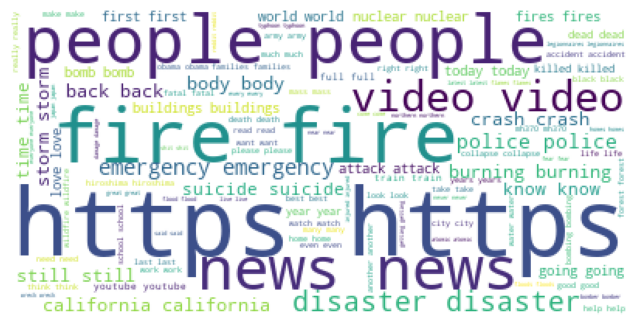

: 

In [ ]:
wordcloud(text)


The most common words in the corpus are https, people, fire, video, news, disaster, emergency for the top 7. We observe behind them interesting words which can add interesting information about the target of the tweets.

#### Stack processing steps to create a more pertinent new text column

Let's create a class which will help us to create a more pertinent text column.

In [107]:
class TextPipeProcessing:
    """The pipeline is composed by (* are obligatory processing):
    - tokenize_text*
    - create_corpus*
    - print_frequency*
    - print_frequency_out_limits
    - print_most_common_words
    - print_n_time_frequency_words
    - delete_n_time_frequency_words
    - lemmatize_words
    - recuperate_results*
    - plot_wordcloud
    - add_results_to_data_frame*
    """
    def __init__(self, data_frame, text_column: str):
        
        self.data_frame = data_frame
        
        self.text_column = text_column
    
    def tokenize_text(self, language: str = 'english', regex: str = r"\w+"):
        
        texts = self.data_frame[self.text_column]
        
        texts = texts.tolist()
        
        self.stopwords = set(stopwords.words(language))
        
        self.tokens = pre_transformation(texts, self.stopwords)
    
        return self.tokens
        
    def create_corpus(self):
        self.corpus = []
        for document in tqdm(new_texts):
            
            self.corpus.extend(document)
        
        self.corpus_text = nltk.text.Text(corpus)
        
        print(f"Number of words: {len(self.corpus):->16}")
        print(f"Number of unique words: {len(self.corpus_text.vocab()):->16}")
        
        return self.corpus, self.corpus_text
    
    def print_frequency(self):
        self.frequency = pd.DataFrame.from_dict(self.corpus_text.vocab(), 'index')
        
        self.frequency.rename({0: 'frequency'}, inplace=True, axis=1)
        
        self.frequency.reset_index(level=0, inplace=True)
        
        print(self.frequency.head())
    
    def print_frequency_out_limits(self):
        px.box(data_frame=self.frequency, x="frequency", hover_data=['index', 'frequency']) 
        
        self.low, self.high = guess_limitations(self.frequency, 'frequency') 
        
        print(f"Low limit: {self.low:->16}")
        print(f"High limit: {self.high:->16}")
    
    def print_most_common_words(self, lower_bound: int = 400, n_words: int = 20):
        self.freq_total = nltk.Counter(self.corpus_text.vocab())
        
        self.stopwords_common = list(zip(*freq_total.most_common(lower_bound)))[0]
        
        print("Most common words are:")
        print(self.stopwords_common[:20])
    
    def print_n_time_frequency_words(self, n_time_freq: int = 1, n_words: int = 100):
        
        self.frequency[self.frequency['frequency'] == n_time_freq].shape[0]
        
        n_time_frequency = self.frequency[self.frequency['frequency'] == n_time_freq]
        
        print(n_time_frequency.iloc[:n_words,:])
    
    def delete_n_time_frequency_words(self, n_time_freq: int = 1):
        
        n_time_frequency = self.frequency[self.frequency['frequency'] == n_time_freq]
        
        self.new_frequency = self.frequency.loc[~self.frequency['index'].isin(n_time_frequency['index'].to_list()), :]
        
        print("The new frequency data frame is stored in `new_frequency` variable.")
        
        print(f"The number of deleted observations: {n_time_frequency.shape[0]:->16}")
        
    def lemmatize_words(self, lemmatizer):
        
        self.new_frequency = self.new_frequency.copy()
        
        self.new_frequency.loc['index'] = self.new_frequency['index'].apply(lambda idx: lemmatizer.lemmatize(idx))
        
        self.new_frequency.dropna(axis=0, inplace=True)
        
        self.new_frequency['frequency'] = self.new_frequency['frequency'].astype('int32')
    
    def recuperate_results(self):
        try:
            frequency = self.new_frequency.copy()
        except:
            frequency = self.frequency.copy()
        finally:
            print("The recuperate results method recuperates the last version of the frequency data frame as a freqDist. Make sure to add transformations before calling this method!")
        
        frequency.set_index('index', inplace = True)
        
        frequency = frequency.to_dict()
        
        frequency = frequency['frequency']
        
        self.results = nltk.FreqDist(frequency)
        
        return self.results
    
    def plot_wordcloud(self):
        try:
            text = get_text_from_freqs(self.results)
            wordcloud(text)
        except:
            raise AttributeError("You have to call `recuperate_results` method before plotting the wordcloud!")
    
    def add_results_to_data_frame(self, new_text_column_name: Union[str, None] = None):
        
        if not new_text_column_name: new_text_column_name = self.text_column
        
        def modify_text_column(index):
            
            tokens = self.tokens[index]
            
            for idx, token in enumerate(tokens):
                if token in self.results:
                    tokens[idx] = token
            
            return " ".join(self.tokens[index])
        
        self.data_frame[new_text_column_name] = self.data_frame.index.map(modify_text_column)
            
            
            
      

Let's apply the pipelined text processing class to the data frame.

In [108]:
process_text = TextPipeProcessing(train_set_, 'text')

In [109]:
tokens = process_text.tokenize_text()

100%|██████████| 7613/7613 [00:00<00:00, 64934.67it/s]


In [112]:
corpus = process_text.create_corpus()

100%|██████████| 7613/7613 [00:00<00:00, 1935461.05it/s]

Number of words: -----------69943


TypeError: unhashable type: 'list'

In [111]:
process_text.print_frequency()

TypeError: unhashable type: 'list'

In [ ]:
process_text.print_frequency_out_limits()

Low limit: -------------0.5
High limit: -------------3.5


: 

In [ ]:
process_text.print_most_common_words()

Most common words are:
('http', 'https', 'like', 'fire', 'people', 'news', 'video', 'disaster', 'emergency', 'police', 'would', 'body', 'still', 'california', 'storm', 'burning', 'back', 'crash', 'suicide', 'time')


: 

In [ ]:
process_text.delete_n_time_frequency_words()

The new frequency data frame is stored in `new_frequency` variable.
The number of deleted observations: -----------14107


: 

In [ ]:
process_text.lemmatize_words(lemmatizer)

: 

In [ ]:
results = process_text.recuperate_results()

The recuperate results method recuperates the last version of the frequency data frame as a freqDist. Make sure to add transformations before calling this method!


: 

100%|██████████| 5786/5786 [00:00<00:00, 653848.55it/s]


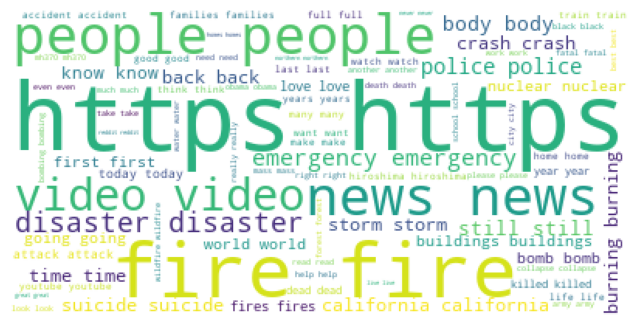

: 

In [ ]:
process_text.plot_wordcloud()

In [ ]:
process_text.add_results_to_data_frame('new_text')

5it [00:00, 4997.98it/s]
6it [00:00, ?it/s]
11it [00:00, ?it/s]
6it [00:00, ?it/s]
8it [00:00, ?it/s]
10it [00:00, ?it/s]
12it [00:00, ?it/s]
3it [00:00, ?it/s]
6it [00:00, ?it/s]
4it [00:00, 4017.53it/s]
5it [00:00, ?it/s]
14it [00:00, ?it/s]
8it [00:00, ?it/s]
5it [00:00, ?it/s]
5it [00:00, ?it/s]
0it [00:00, ?it/s]
2it [00:00, ?it/s]
2it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
2it [00:00, ?it/s]
2it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
2it [00:00, ?it/s]
2it [00:00, 1691.25it/s]
1it [00:00, ?it/s]
2it [00:00, ?it/s]
0it [00:00, ?it/s]
6it [00:00, 4485.09it/s]
6it [00:00, ?it/s]
8it [00:00, ?it/s]
2it [00:00, ?it/s]
8it [00:00, 7991.05it/s]
10it [00:00, ?it/s]
6it [00:00, ?it/s]
13it [00:00, 10134.94it/s]
2it [00:00, ?it/s]
10it [00:00, ?it/s]
5it [00:00, 4957.81it/s]
13it [00:00, ?it/s]
4it [00:00, ?it/s]
7it [00:00, ?it/s]
9it [00:00, ?it/s]
9it [00:00, 8998.51it/s]
7it [00:00, ?it/s]
10it [00:00, 6753.03it/s]
14it 

KeyboardInterrupt: 

: 

In [ ]:
train_set_.head()

,keyword,text,target,tweet_len,new_text
0,,Our Deeds are the Reason of this #earthquake M...,1,69,deeds reason earthquake allah forgive
1,,Forest fire near La Ronge Sask. Canada,1,38,forest fire near ronge sask canada
2,,All residents asked to 'shelter in place' are ...,1,133,residents asked shelter place notified officer...
3,,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfires evacuation orders cal...
4,,Just got sent this photo from Ruby #Alaska as ...,1,88,sent photo ruby alaska smoke wildfires pours s...


: 

Let's count the occurrence of each target class.

In [ ]:
train_set_['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

: 

The occurrence of class 0 (no disaster) is more important than that of class 1 (disaster).

Some text can contains only commas since we delete many words in the corpus. So let's recount the length of the texts.

In [ ]:
train_set_['new_tweet_len'] = train_set_['new_text'].map(lambda text: len(text))

: 

In [ ]:
train_set_['new_tweet_len'].min()

0

: 

In [ ]:
(train_set_['new_tweet_len'] == 0).sum(), train_set_['']

4

: 

We can see that the new text column contains 4 empty texts. Let's create a new data frame taking only the columns that interests us.

In [ ]:
new_train_set = train_set_[['keyword', 'new_text', 'new_tweet_len', 'target']]

: 

Let's suppress the new text lines containing commas.

In [ ]:
new_train_set = new_train_set[new_train_set['new_tweet_len'] != 0]

: 

In [ ]:
new_train_set.head()

,keyword,new_text,new_tweet_len,target
0,,deeds reason earthquake allah forgive,37,1
1,,forest fire near ronge sask canada,34,1
2,,residents asked shelter place notified officer...,88,1
3,,people receive wildfires evacuation orders cal...,53,1
4,,sent photo ruby alaska smoke wildfires pours s...,51,1


: 